In [1]:
# Import packages
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)

In [2]:
# Set connection to SQL database and save datasets
conn = sqlite3.connect("Final_Project.sqlite")
election_results = pd.read_sql('select * from Election_Results',conn)
prev_pres = pd.read_sql('select * from Previous_Presidents',conn)
gdp = pd.read_sql('select * from Econ',conn)
states = pd.read_sql('select * from States',conn)
turnout = pd.read_sql('select * from Turnout',conn)
total_data = pd.read_sql('select * from Total_Data',conn)
conn.close()

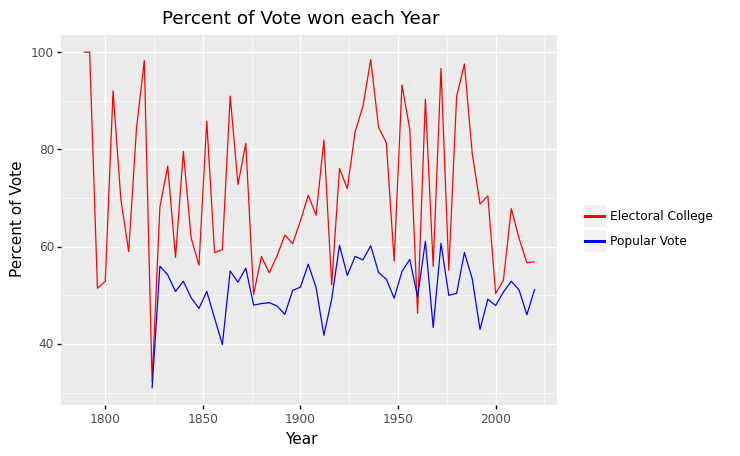

<ggplot: (8780111321887)>

In [4]:
# Visualize election results
(
    ggplot(election_results, aes(x = "Year")) +
    geom_line(aes(y = "Electoral College", color = '"red"')) + 
    geom_line(aes(y = "Popular Vote", color = "'blue'")) +
    labs(y = "Percent of Vote", title = "Percent of Vote won each Year", color = "") +
    scale_color_manual(values = ("red","blue"), labels = ("Electoral College", 'Popular Vote'))
)

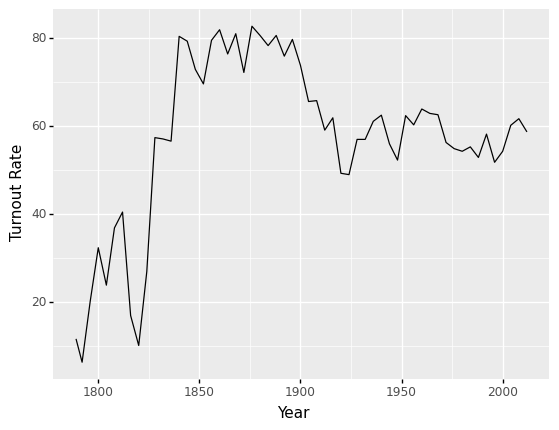

<ggplot: (8780111632026)>

In [5]:
# Visualize turnout data
(
    ggplot(turnout, aes(x = "Year", y = "Turnout Rate")) +
    geom_line()
)

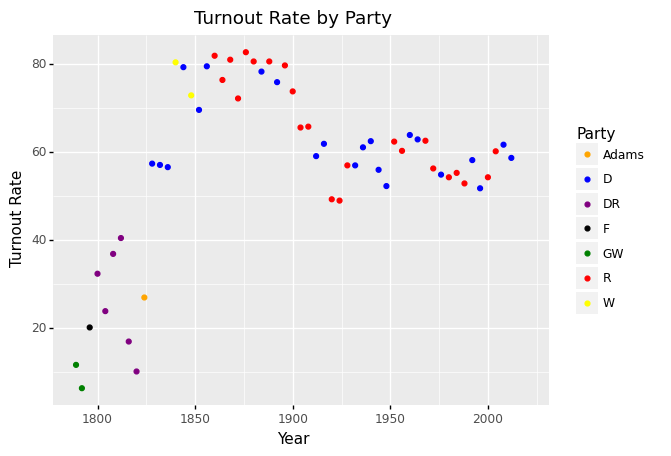

<ggplot: (8780111663535)>

In [6]:
# Turnout Rate each year by Party
(
    ggplot(total_data, aes(x = "Year", y = "Turnout Rate", color = "Party")) +
    geom_point() +
    labs(title = "Turnout Rate by Party") +
    scale_color_manual(values = ("Orange", "Blue", "Purple", "Black", "Green", "Red", "Yellow"))
)

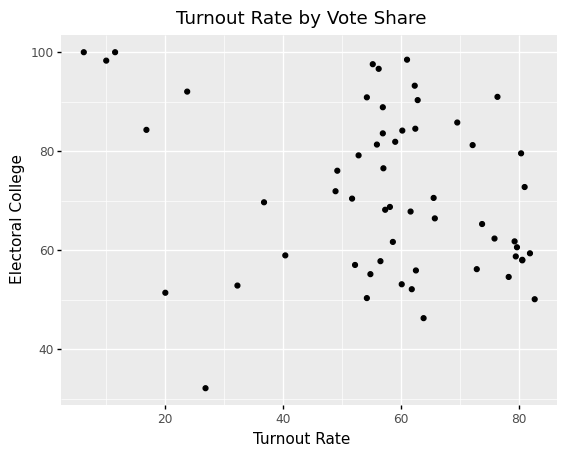

<ggplot: (8780111495967)>

In [7]:
# Turnout Rate by Vote Share
(
    ggplot(total_data, aes(x = "Turnout Rate", y = "Electoral College")) +
    geom_point() +
    labs(title = "Turnout Rate by Vote Share")
)

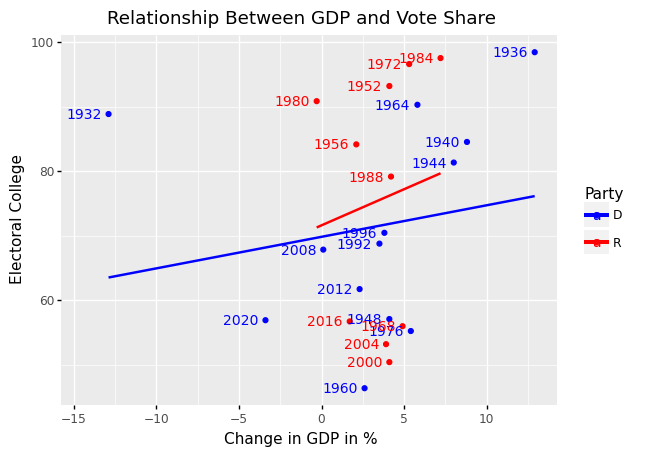

<ggplot: (8780111779865)>

In [8]:
# GDP and Vote Share
(
    ggplot(total_data[35:], aes(x = "Change in GDP in %", y = "Electoral College", color = "Party", label = "Year")) +
    geom_point() +
    geom_text(size = 10, nudge_x = -1.5) +
    labs(title = "Relationship Between GDP and Vote Share") +
    scale_color_manual(values = ("Blue", "Red")) +
    geom_smooth(method = 'lm', se = False)
)

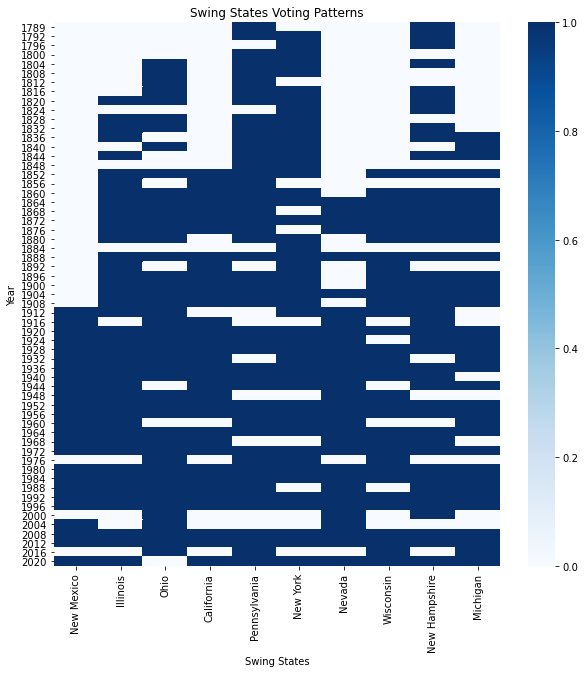

In [10]:
# Heatmap for Swing States

key_states = ['New Mexico', 'Illinois', 'Ohio', 'California', 'Pennsylvania', 'New York', 'Nevada', 'Wisconsin', 'New Hampshire', 'Michigan']
swing_states_overall = ['New Mexico', 'Illinois', 'Ohio', 'California', 'Pennsylvania', 'New York', 'Nevada']
swing_states_accurate = ['Ohio', 'Nevada', 'Pennsylvania', 'New Mexico', 'Wisconsin', 'New Hampshire', 'Michigan']

# Create a figure 
plt.figure(figsize = (10,10))

# Create a heatmap
plot = sns.heatmap(total_data[key_states],
                  yticklabels= total_data.Year, cmap = "Blues")
ax = plt.gca()
ax.set_yticklabels(total_data.Year)

#Label x and y axes
plt.xlabel('Swing States')
plt.ylabel('Year')

#Add a title
plt.title('Swing States Voting Patterns')

plt.show()